### Veremos cual variable tiene más peso para precedir finding categories

Primeras filas del nuevo DataFrame:
                           study_id                         series_id  \
0  8b202f831f93639ebcb9cccccec03b09  c8178ca9c46965cc1fa8e3dd59148564   
1  8b202f831f93639ebcb9cccccec03b09  c8178ca9c46965cc1fa8e3dd59148564   
2  8b202f831f93639ebcb9cccccec03b09  c8178ca9c46965cc1fa8e3dd59148564   
3  b9c15e629cf02f501acbc194420d749c  7b190f882820bc25184a0ebe45b0b77e   
4  76c60021bdad852f982497bb6dfa6cf2  0d129a541e9eaab4f63db05626eb2659   

                           image_id laterality view_position  height  width  \
0  001ade2a3cb53fd808bd2856a0df5413          R            CC    2812   2012   
1  001ade2a3cb53fd808bd2856a0df5413          R            CC    2812   2012   
2  001ade2a3cb53fd808bd2856a0df5413          R            CC    2812   2012   
3  002074412a8fc178c271fb93b55c3e29          R            CC    3518   2800   
4  002460132586dc0c7b88a59dce6e77bd          L           MLO    3518   2800   

  breast_birads breast_density            finding_

,Description,Value
0,Session id,123
1,Target,finding_categories
2,Target type,Binary
3,Target mapping,"['Mass']: 0, ['Suspicious Calcification']: 1"
4,Original data shape,"(1525, 28)"
5,Transformed data shape,"(1525, 41)"
6,Transformed train set shape,"(1067, 41)"
7,Transformed test set shape,"(458, 41)"
8,Numeric features,12
9,Categorical features,15


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:10:56
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7648,0.7467,0.7648,0.7449,0.7328,0.2721,0.3045,0.0820
et,Extra Trees Classifier,0.7507,0.7025,0.7507,0.7323,0.7364,0.2948,0.3020,0.0770
lightgbm,Light Gradient Boosting Machine,0.7498,0.6870,0.7498,0.7376,0.7416,0.3178,0.3205,0.4330
rf,Random Forest Classifier,0.7488,0.6994,0.7488,0.7276,0.7326,0.2830,0.2900,0.0830
gbc,Gradient Boosting Classifier,0.7423,0.6782,0.7423,0.7261,0.7311,0.2865,0.2900,0.0890
ridge,Ridge Classifier,0.7394,0.7016,0.7394,0.7073,0.7125,0.2200,0.2320,0.0400
dummy,Dummy Classifier,0.7366,0.5000,0.7366,0.5427,0.6249,0.0000,0.0000,0.0390
knn,K Neighbors Classifier,0.7235,0.6442,0.7235,0.6866,0.6860,0.1443,0.1657,0.0410
lda,Linear Discriminant Analysis,0.7104,0.6632,0.7104,0.6878,0.6962,0.1911,0.1930,0.0400
dt,Decision Tree Classifier,0.7095,0.6368,0.7095,0.7157,0.7109,0.2632,0.2650,0.0390



Mejor modelo entrenado:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


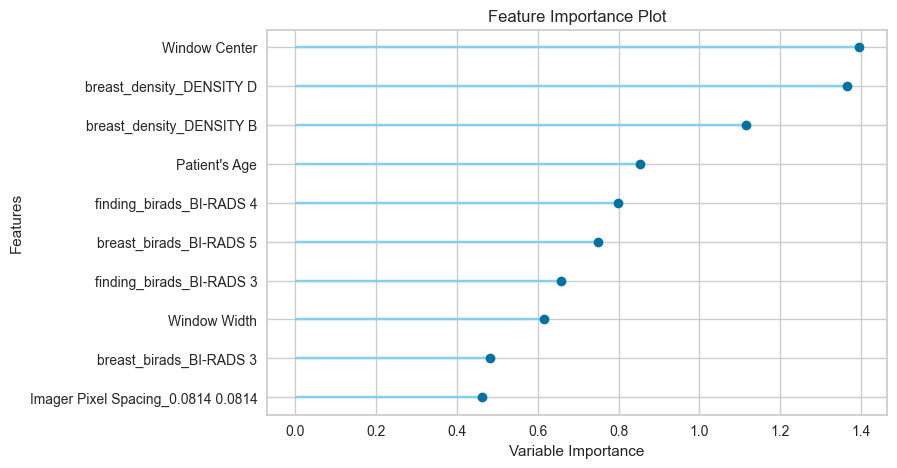


Métricas de los modelos:
                                    Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.7648  0.7467  0.7648  0.7449   
et                 Extra Trees Classifier    0.7507  0.7025  0.7507  0.7323   
lightgbm  Light Gradient Boosting Machine    0.7498  0.6870  0.7498  0.7376   
rf               Random Forest Classifier    0.7488  0.6994  0.7488  0.7276   
gbc          Gradient Boosting Classifier    0.7423  0.6782  0.7423  0.7261   
ridge                    Ridge Classifier    0.7394  0.7016  0.7394  0.7073   
dummy                    Dummy Classifier    0.7366  0.5000  0.7366  0.5427   
knn                K Neighbors Classifier    0.7235  0.6442  0.7235  0.6866   
lda          Linear Discriminant Analysis    0.7104  0.6632  0.7104  0.6878   
dt               Decision Tree Classifier    0.7095  0.6368  0.7095  0.7157   
ada                  Ada Boost Classifier    0.7086  0.6308  0.7086  0.6976   
nb                        

In [10]:
# Importar las bibliotecas necesarias
import pandas as pd
from pycaret.classification import setup, compare_models, plot_model, pull

# Ruta del archivo CSV procesado
processed_csv = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_mass_calcifications.csv'

# Cargar el archivo CSV en un DataFrame
df_processed = pd.read_csv(processed_csv)

# Mostrar las primeras filas del nuevo CSV
print("Primeras filas del nuevo DataFrame:")
print(df_processed.head())

# Verificar las columnas del CSV
print("\nColumnas en el DataFrame antes de eliminar:")
print(df_processed.columns)

# Eliminar las columnas que no deseas considerar en el análisis
columns_to_exclude = ['study_id', 'series_id', 'image_id', 'split', 'SOP Instance UID', 
                      'Series Instance UID', 'SOP Instance UID.1', 'Manufacturer', 
                      "Manufacturer's Model Name"]

df_processed = df_processed.drop(columns=columns_to_exclude, errors='ignore')

# Verificar las columnas después de eliminar
print("\nColumnas en el DataFrame después de eliminar:")
print(df_processed.columns)

# Verificar valores únicos en la columna 'finding_categories' que deseas predecir
print("\nValores únicos en la columna 'finding_categories':")
print(df_processed['finding_categories'].unique())

# Configuración de PyCaret para clasificación, prediciendo 'finding_categories'
clf_setup = setup(data=df_processed,
                  target='finding_categories',  # Columna objetivo para predecir
                  session_id=123,
                  preprocess=True)

# Comparar modelos para encontrar el mejor
best_model = compare_models()

# Mostrar el mejor modelo entrenado
print("\nMejor modelo entrenado:")
print(best_model)

# Importancia de las características
plot_model(best_model, plot='feature')

# Comparar modelos y métricas
print("\nMétricas de los modelos:")
model_results = pull()
print(model_results)


## Análisis de Resultados

### 1. Configuración del Dataset

- **Target**: El objetivo es clasificar entre dos categorías: **'Mass' (0)** y **'Suspicious Calcification' (1)**.
- **Forma del Dataset**: El dataset inicial contiene **1525 registros** y **28 columnas**. Tras la transformación de datos, el número de características aumentó a **41** debido a la codificación de variables categóricas.
- **Variables numéricas y categóricas**: Hay un total de **12 características numéricas** y **15 características categóricas** que se utilizaron para entrenar los modelos.
- **Valores faltantes**: El **99.8% de las filas** tienen valores faltantes. Estos fueron tratados mediante **imputación simple**, utilizando la media para las variables numéricas y la moda para las variables categóricas.

### 2. Comparación de Modelos

Se entrenaron varios modelos de clasificación y se evaluaron usando métricas como **Accuracy**, **AUC**, **Recall**, **Precision** y **F1 Score**. Los resultados clave son los siguientes:

- **Logistic Regression**:
  - **Accuracy**: 0.7648 (el mejor entre todos los modelos).
  - **AUC**: 0.7467, lo que indica una buena capacidad para distinguir entre las clases.
  - **Recall**: 0.7648, capturando una buena proporción de casos positivos.
  - **F1 Score**: 0.7328, mostrando un equilibrio decente entre precisión y recall.
  
- **LightGBM**:
  - **F1 Score**: 0.7416, el más alto entre los modelos, indicando un buen balance entre las métricas de precisión y recall.
  - **Accuracy**: 0.7498, ligeramente inferior a Logistic Regression.
  - **Kappa**: 0.3178, lo que indica una mayor concordancia entre predicciones y valores reales.

- **Extra Trees Classifier**:
  - **Accuracy**: 0.7507, bastante cercano a Logistic Regression.
  - **F1 Score**: 0.7364, mostrando un rendimiento sólido en balance de métricas.

En general, **Logistic Regression** tiene el mejor **Accuracy** y **AUC**, pero **LightGBM** tiene un mejor **F1 Score** y **Kappa**, lo que lo hace adecuado si se busca un equilibrio entre ambas clases.

### 3. Importancia de las Características

El modelo de **Logistic Regression**, que obtuvo el mejor rendimiento en términos de precisión general, identificó las siguientes características como las más importantes:

- **Window Center**: Esta es la característica más influyente en la predicción, lo que sugiere que los parámetros de la ventana de imagen tienen un papel importante en la clasificación entre las dos clases.
- **Breast Density**:
  - Las densidades **D** y **B** tienen una influencia significativa en el modelo, lo que indica que la densidad mamaria es un factor clave para predecir si una imagen muestra una masa o calcificaciones sospechosas.
  
- **Patient's Age**: La edad del paciente es otra característica importante. Esto es consistente con hallazgos clínicos que sugieren que la edad puede influir en la probabilidad de calcificaciones sospechosas o masas.
  
- **BI-RADS Levels**: Los niveles **BI-RADS 3, 4 y 5** también son predictivos, lo que indica que el riesgo de malignidad asociado a estos niveles afecta las predicciones del modelo.

Estas características destacan la importancia de los parámetros técnicos de las imágenes, así como factores clínicos (como la densidad mamaria y la edad) en la predicción de las categorías de hallazgos.
